In [18]:
#install.packages('NbClust')
#install.packages('flexclust')
#install.packages('gmodels')
#install.packages('ggplot2')
#install.packages("fpc")
library(NbClust)
library(flexclust)
library(gmodels)
library(ggplot2)
library(fpc)

Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


In [19]:
#read the seed data set
data <- read.table(file='../data/seeds_dataset.txt', header=FALSE, sep="")
head(data)
dim(data)

V1,V2,V3,V4,V5,V6,V7,V8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


[1] 210   8

In [20]:
seeds <- na.omit(data)
head(seeds)
dim(seeds)

V1,V2,V3,V4,V5,V6,V7,V8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


[1] 210   8

In [21]:
summary(seeds)

       V1              V2              V3               V4       
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262  
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524  
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
       V5              V6               V7              V8   
 Min.   :2.630   Min.   :0.7651   Min.   :4.519   Min.   :1  
 1st Qu.:2.944   1st Qu.:2.5615   1st Qu.:5.045   1st Qu.:1  
 Median :3.237   Median :3.5990   Median :5.223   Median :2  
 Mean   :3.259   Mean   :3.7002   Mean   :5.408   Mean   :2  
 3rd Qu.:3.562   3rd Qu.:4.7687   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :4.033   Max.   :8.4560   Max.   :6.550   Max.   :3  

In [22]:
colnames(seeds) = c("Area", "Perimeter", "Compactness", "Length", "Width", "Asymc Coef", "Grooveln", "Type")

# Feature Relationships

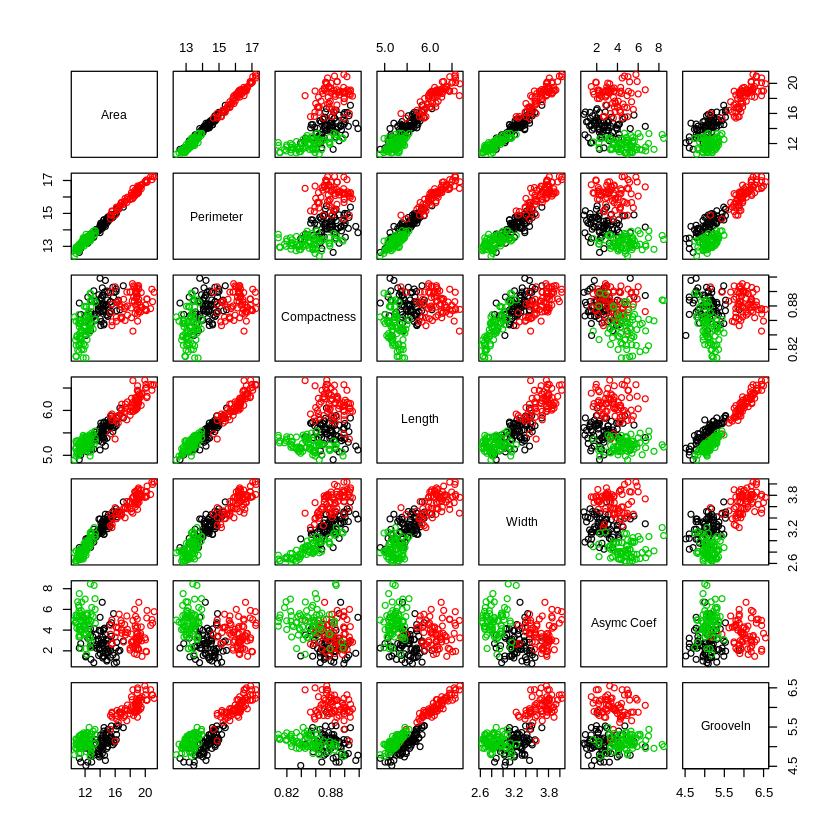

In [23]:
plot(seeds[1:7], col = seeds$Type)

# K-Means Clustering Technique


  1   2 
 84 126 

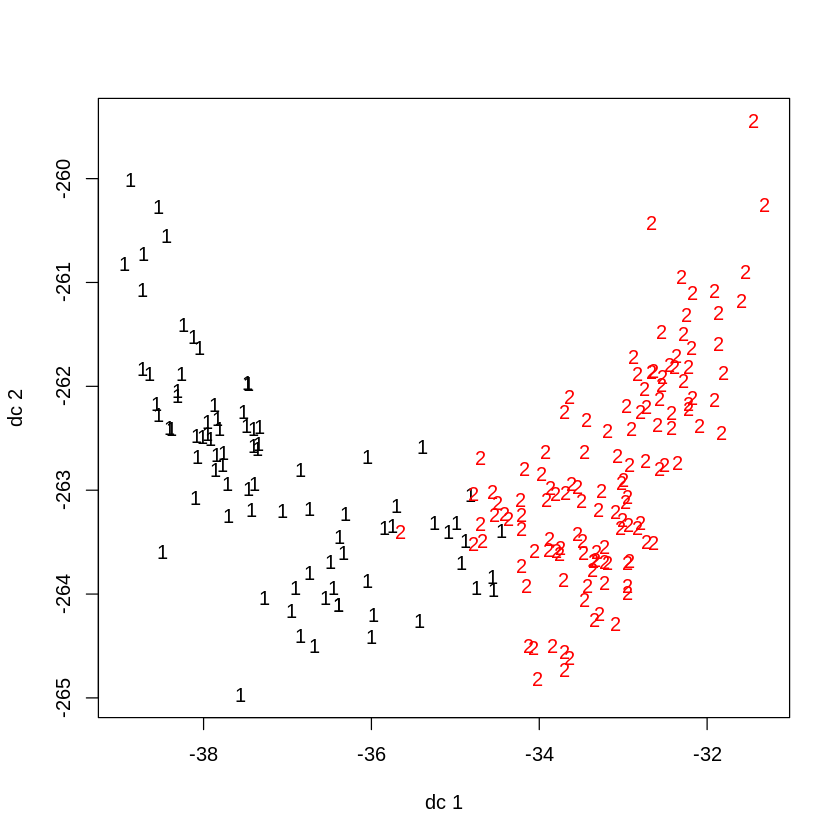

In [32]:
fit <- kmeans(seeds, 2) 
table(fit$cluster)
plotcluster(seeds, fit$cluster)


 1  2  3 
74 75 61 

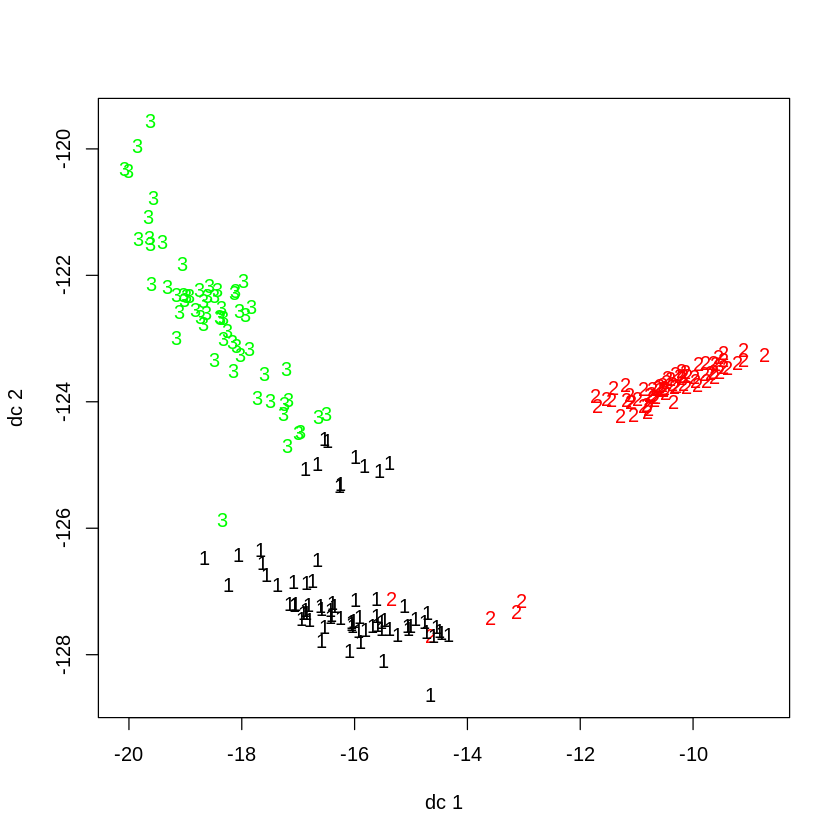

In [34]:
fit <- kmeans(seeds, 3) 
table(fit$cluster)
plotcluster(seeds, fit$cluster)


 1  2  3  4  5  6 
19 23 48 62 20 38 

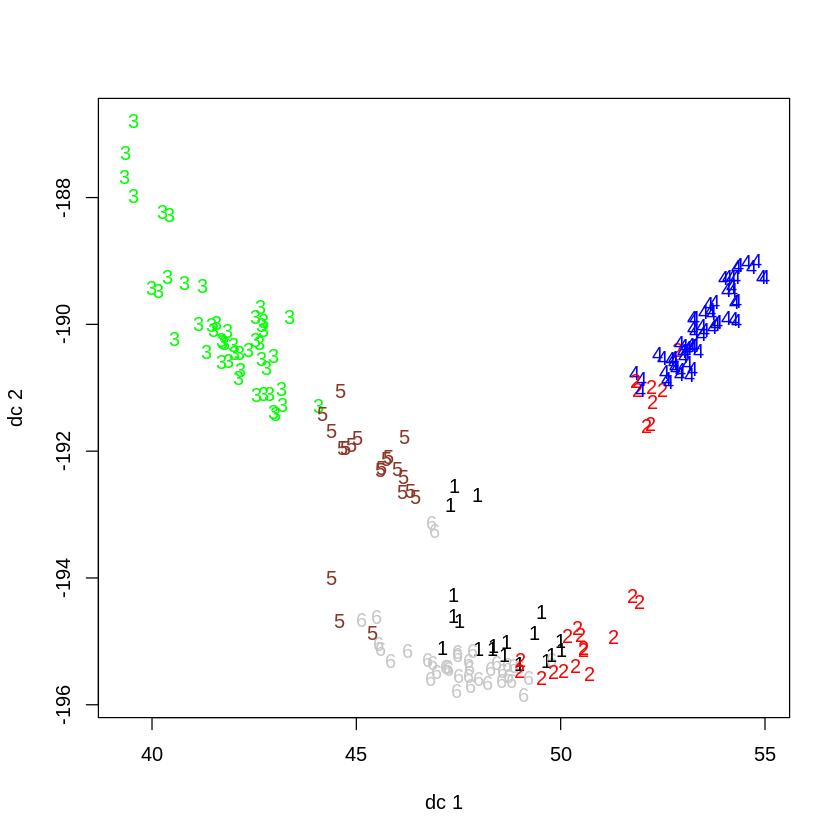

In [35]:
fit <- kmeans(seeds, 6) 
table(fit$cluster)
plotcluster(seeds, fit$cluster)


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 
 7 10 24 17 20  8 19 12  8 12 17 13 23 20 

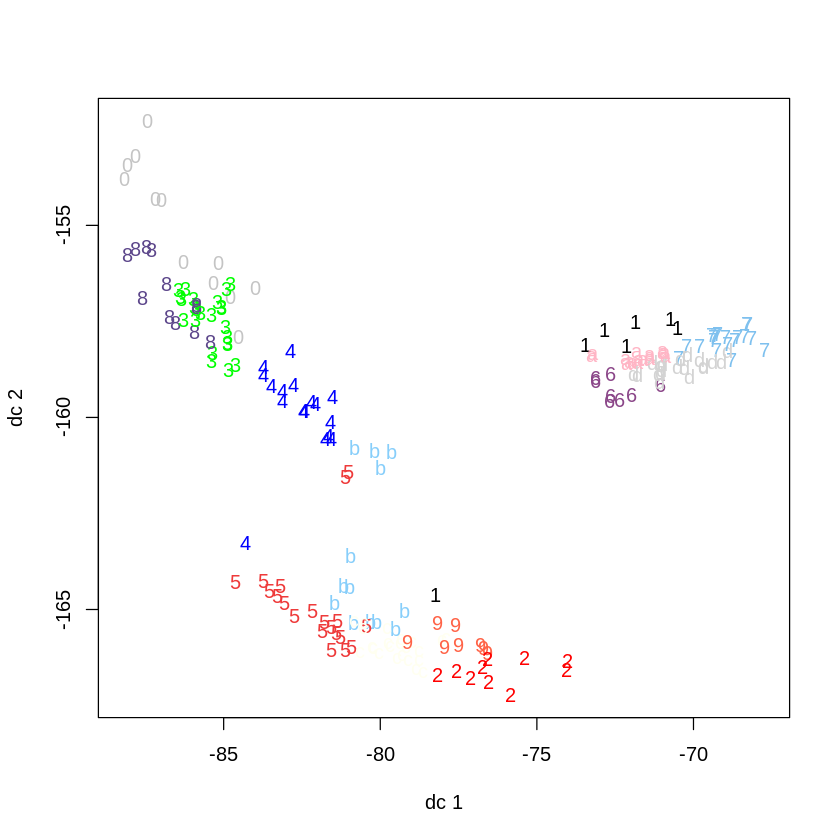

In [36]:
fit <- kmeans(seeds, 14) 
table(fit$cluster)
plotcluster(seeds, fit$cluster)

# Performance Metric (Silhouette and Dunn Index)

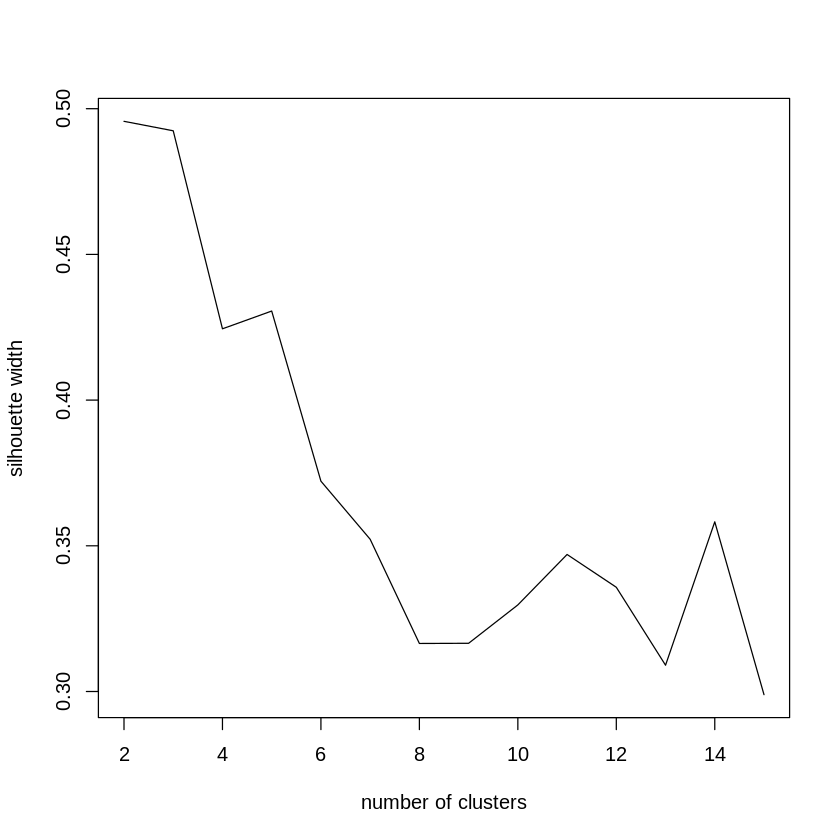

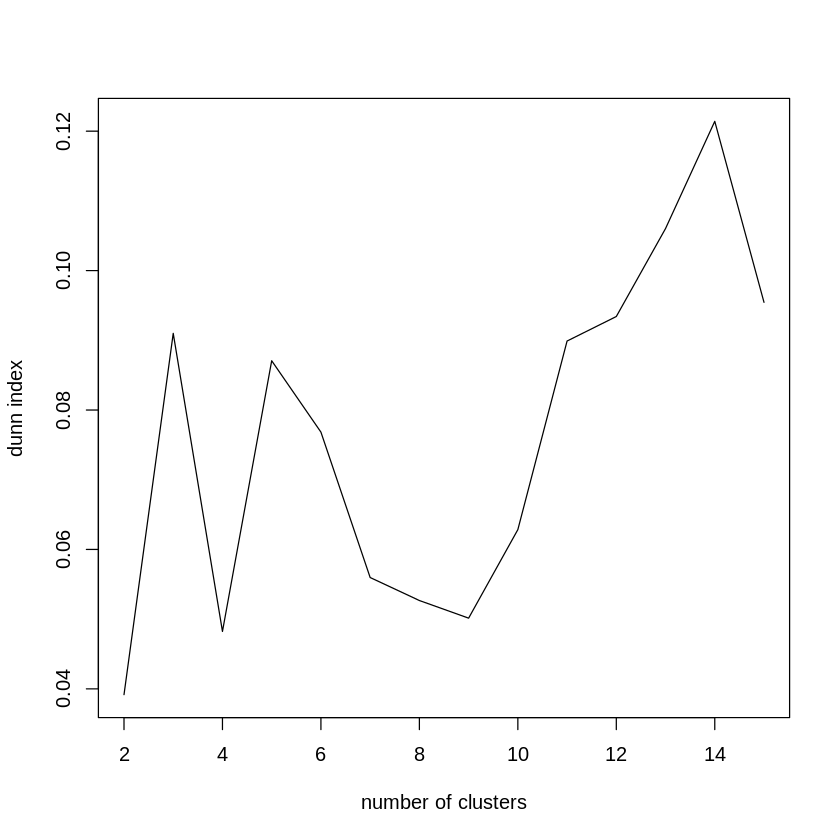

In [27]:
d = dist(seeds, method = "euclidean")
result = matrix(nrow = 14, ncol = 3)
for (i in 2:15){
  cluster_result = kmeans(seeds, i)
  clusterstat=cluster.stats(d, cluster_result$cluster)
  result[i-1,1]=i
  result[i-1,2]=clusterstat$avg.silwidth
  result[i-1,3]=clusterstat$dunn   
}
plot(result[,c(1,2)], type="l", ylab = 'silhouette width', xlab = 'number of clusters')
plot(result[,c(1,3)], type="l", ylab = 'dunn index', xlab = 'number of clusters')